<a href="https://colab.research.google.com/github/tranduynhan02/ML_2022-2023/blob/main/gk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from prettytable import PrettyTable
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Connect drive

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/Study/MachineLearning/gk'

Mounted at /content/gdrive
/content/gdrive/MyDrive/Study/MachineLearning/gk


# Import dataset

In [3]:
df = pd.read_csv('airlines_delay.csv')

In [4]:
#collecting top 5 records
df.head()

,Flight,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
0,2313.0,1296.0,141.0,DL,ATL,HOU,1,0
1,6948.0,360.0,146.0,OO,COS,ORD,4,0
2,1247.0,1170.0,143.0,B6,BOS,CLT,3,0
3,31.0,1410.0,344.0,US,OGG,PHX,6,0
4,563.0,692.0,98.0,FL,BMI,ATL,4,0


In [5]:
#looking into shape of dataset
df.shape

(539382, 8)

*There are 539,382 observations and 8 variables*

In [6]:
#collecting basic informations of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539382 entries, 0 to 539381
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Flight       539382 non-null  float64
 1   Time         539382 non-null  float64
 2   Length       539382 non-null  float64
 3   Airline      539382 non-null  object 
 4   AirportFrom  539382 non-null  object 
 5   AirportTo    539382 non-null  object 
 6   DayOfWeek    539382 non-null  int64  
 7   Class        539382 non-null  int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 32.9+ MB


In [7]:
#collecting statistical informations of columns
df.describe(include = 'all')

,Flight,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
count,539382.000000,539382.000000,539382.000000,539382,539382,539382,539382.000000,539382.000000
unique,NaN,NaN,NaN,18,293,293,NaN,NaN
top,NaN,NaN,NaN,WN,ATL,ATL,NaN,NaN
freq,NaN,NaN,NaN,94097,34449,34440,NaN,NaN
mean,2427.927988,802.728161,132.202104,NaN,NaN,NaN,3.929666,0.445443
std,2067.431700,278.045546,70.117045,NaN,NaN,NaN,1.914666,0.497015
min,1.000000,10.000000,0.000000,NaN,NaN,NaN,1.000000,0.000000
25%,712.000000,565.000000,81.000000,NaN,NaN,NaN,2.000000,0.000000
50%,1809.000000,795.000000,115.000000,NaN,NaN,NaN,4.000000,0.000000
75%,3745.000000,1035.000000,162.000000,NaN,NaN,NaN,5.000000,1.000000


In [8]:
#Checing null or missing value in dataset
df.isnull().sum()

Flight         0
Time           0
Length         0
Airline        0
AirportFrom    0
AirportTo      0
DayOfWeek      0
Class          0
dtype: int64

<Axes: >

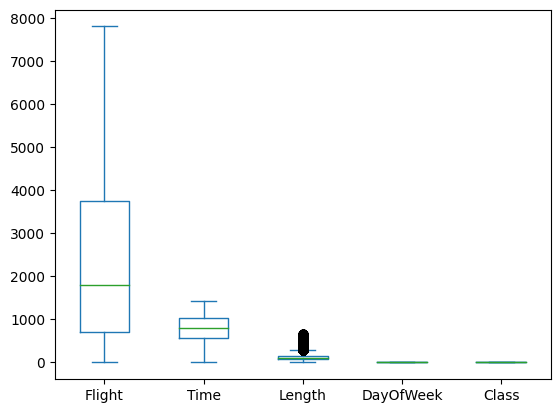

In [9]:
df.plot(kind = 'box')

*As we could see that length alone has some outliers*

# Exploratory Data Analysis (EDA)

In [10]:
df['Class'].value_counts()/df['Class'].value_counts().sum()

0    0.554557
1    0.445443
Name: Class, dtype: float64

*The target variable, that is 'classes' are almost balanced*

<Axes: >

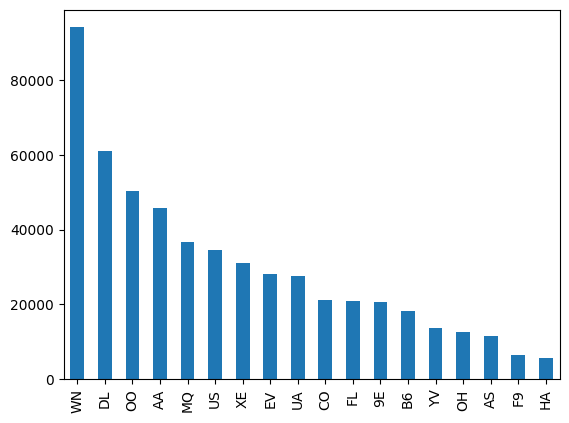

In [11]:
df['Airline'].value_counts().plot.bar()

*WN airline has the most flights and HA airline has the least flights*

<Axes: xlabel='Airline', ylabel='count'>

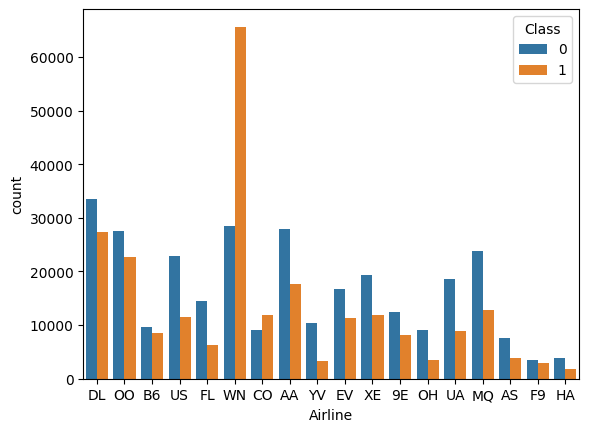

In [12]:
sns.countplot(x = df['Airline'], hue = 'Class', data = df)

*WN airline has the highest delay and HA airline has the lowest delay*

<Axes: xlabel='Airline', ylabel='Length'>

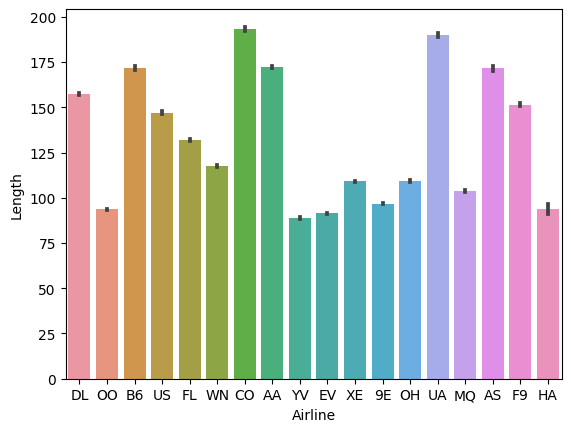

In [13]:
sns.barplot(x = 'Airline', y = 'Length', data = df)

*CO and UA has the longest average flight length*

<Axes: xlabel='Airline', ylabel='Time'>

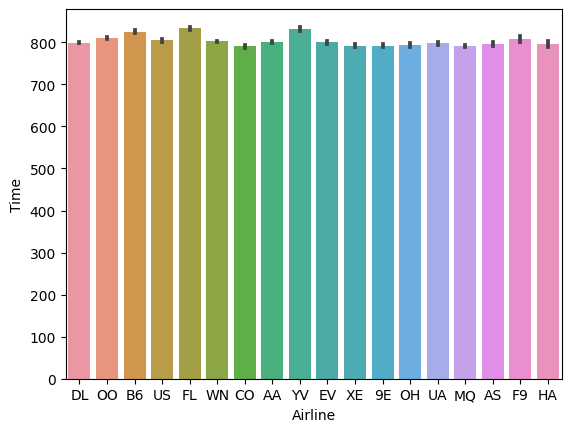

In [14]:
sns.barplot(x = 'Airline', y = 'Time', data = df)

*Almost all of the flights have similar departure times*

<Axes: xlabel='DayOfWeek', ylabel='count'>

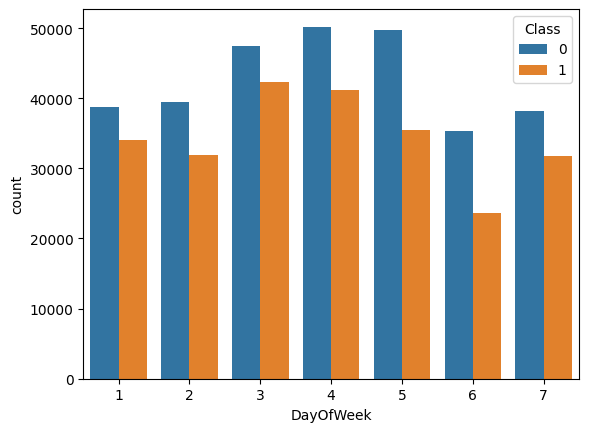

In [15]:
sns.countplot(x = df['DayOfWeek'], hue = 'Class', data = df)


*   There has been more delays in the midweek than weekends
*   Highest delay has been in Wednesday
*   The lowest delay has been in Saturday

# Dropping flights

In [16]:
df = df.drop('Flight', axis = 1)

In [17]:
df.head()

,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
0,1296.0,141.0,DL,ATL,HOU,1,0
1,360.0,146.0,OO,COS,ORD,4,0
2,1170.0,143.0,B6,BOS,CLT,3,0
3,1410.0,344.0,US,OGG,PHX,6,0
4,692.0,98.0,FL,BMI,ATL,4,0


0    299118
1    240264
Name: Class, dtype: int64

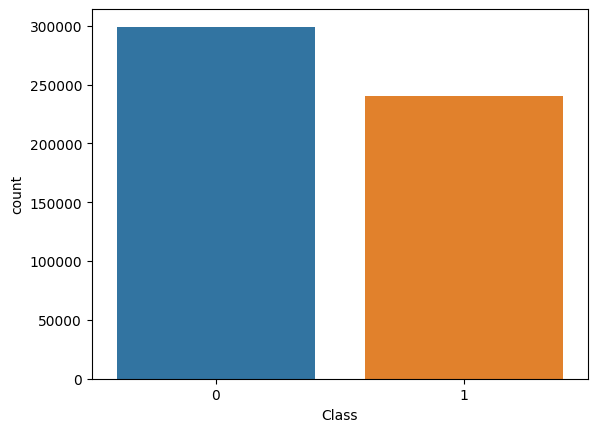

In [18]:
# Visualizing the splitting of 'Class' column
sns.countplot(x='Class', data=df)
df['Class'].value_counts()

*Class is still mostly balanced*

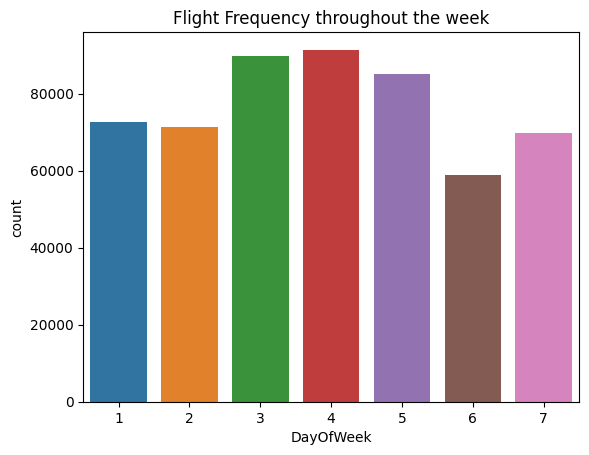

In [19]:
DayOfWeekOrder = list(range(1, 8))
sns.countplot(x = 'DayOfWeek', data = df, order = DayOfWeekOrder).set(title = 'Flight Frequency throughout the week');

*The middle of the week is when most of the flights are booked and Saturdays have the least number of flights. Thursday has the most booked flights.*

# Encoding Categorical Features

In [20]:
df['AirportTo'] = LabelEncoder().fit_transform(df['AirportTo'])

In [21]:
df['AirportFrom'] = LabelEncoder().fit_transform(df['AirportFrom'])

In [22]:
df['Airline'] = LabelEncoder().fit_transform(df['Airline'])

In [23]:
df.head()

,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
0,1296.0,141.0,5,16,129,1,0
1,360.0,146.0,12,65,208,4,0
2,1170.0,143.0,3,35,60,3,0
3,1410.0,344.0,14,203,217,6,0
4,692.0,98.0,8,32,16,4,0


# Building model

In [24]:
# Seperating dependent and independent features
X = df.drop('Class', axis=1)
y = df['Class']

In [25]:
# Splitting the training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [26]:
print('X_train shape is', X_train.shape)
print('X_test shape is', X_test.shape)
print('y_train shape is', y_train.shape)
print('y_test shape is', y_test.shape)

X_train shape is (377567, 6)
X_test shape is (161815, 6)
y_train shape is (377567,)
y_test shape is (161815,)


In [27]:
# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Neural network

              precision    recall  f1-score   support

           0       0.64      0.81      0.71     89474
           1       0.65      0.43      0.52     72341

    accuracy                           0.64    161815
   macro avg       0.64      0.62      0.61    161815
weighted avg       0.64      0.64      0.63    161815



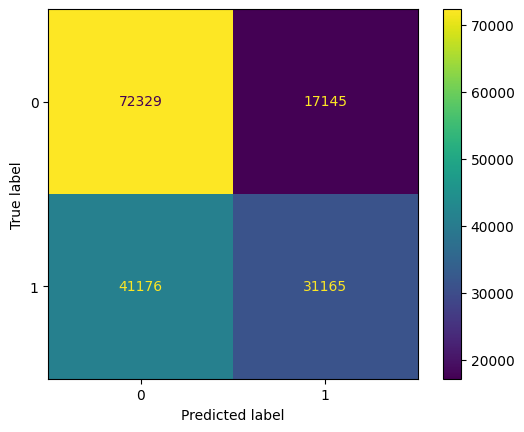

In [32]:
# Train model
mlp = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000)
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)
# Evaluate model
acc_mlp = round(accuracy_score(y_test, y_pred_mlp),4)
precision_mlp = round((precision_score(y_test, y_pred_mlp, average = 'macro')),4)
f1_mlp = round((f1_score(y_test, y_pred_mlp, average = 'macro')),4)
recall_mlp = round((recall_score(y_test, y_pred_mlp, average = 'macro')),4)
print(classification_report(y_test, y_pred_mlp))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_mlp)

Accuracy:  0.6396
Precision:  0.6412
Recall:  0.6196
F1:  0.6146
              precision    recall  f1-score   support

           0       0.64      0.81      0.71     89474
           1       0.65      0.43      0.52     72341

    accuracy                           0.64    161815
   macro avg       0.64      0.62      0.61    161815
weighted avg       0.64      0.64      0.63    161815



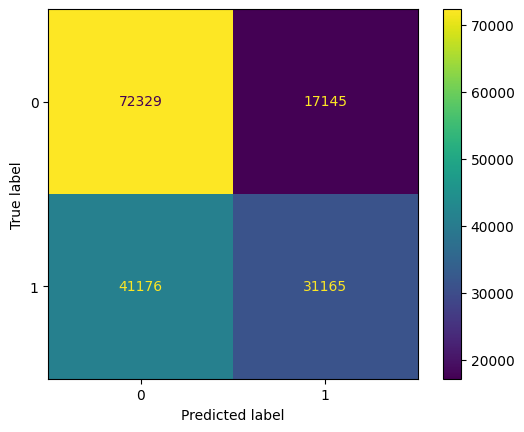

In [60]:
print("Accuracy: ", acc_mlp)
print("Precision: ", precision_mlp)
print("Recall: ", recall_mlp)
print("F1: ", f1_mlp)
print(classification_report(y_test, y_pred_mlp))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_mlp)

# Support Vector Machine(SVM)

In [33]:
# Train SVM model
svm = SVC(kernel="rbf", C=1, gamma=0.1)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
# Evaluate model
acc_svm = round(accuracy_score(y_test, y_pred_svm),4)
precision_svm = round((precision_score(y_test, y_pred_svm, average = 'macro')),4)
f1_svm = round((f1_score(y_test, y_pred_svm, average = 'macro')),4)
recall_svm = round((recall_score(y_test, y_pred_svm, average = 'macro')),4)
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.61      0.79      0.69     89474
           1       0.59      0.37      0.46     72341

    accuracy                           0.61    161815
   macro avg       0.60      0.58      0.57    161815
weighted avg       0.60      0.61      0.59    161815



Accuracy:  0.6052
Precision:  0.6013
Recall:  0.5831
F1:  0.574
              precision    recall  f1-score   support

           0       0.61      0.79      0.69     89474
           1       0.59      0.37      0.46     72341

    accuracy                           0.61    161815
   macro avg       0.60      0.58      0.57    161815
weighted avg       0.60      0.61      0.59    161815



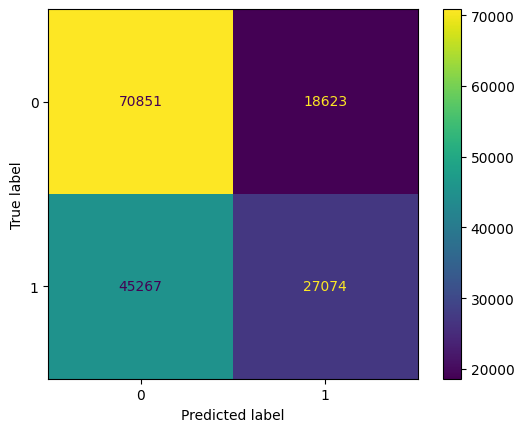

In [61]:
print("Accuracy: ", acc_svm)
print("Precision: ", precision_svm)
print("Recall: ", recall_svm)
print("F1: ", f1_svm)
print(classification_report(y_test, y_pred_svm))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_svm)

# K-Nearest Neighbor(kNN)

{'n_neighbors': 9}
KNeighborsClassifier(n_neighbors=9)
              precision    recall  f1-score   support

           0       0.64      0.69      0.67     89474
           1       0.58      0.52      0.55     72341

    accuracy                           0.62    161815
   macro avg       0.61      0.61      0.61    161815
weighted avg       0.61      0.62      0.61    161815



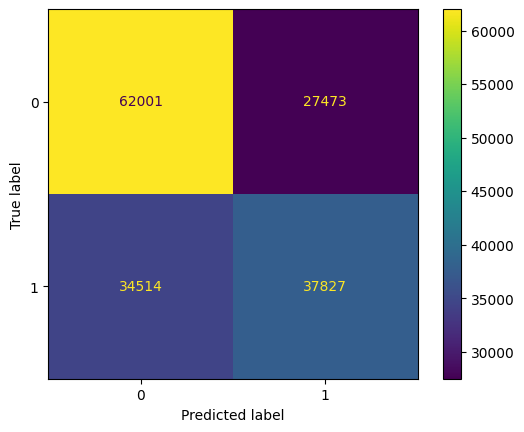

In [31]:
# Train kNN model with parameter tuning
parameters = {'n_neighbors': [3, 5, 7, 9]}
kNN = KNeighborsClassifier()
grid_kNN = GridSearchCV(kNN, parameters, scoring='accuracy', n_jobs=-1)
grid_kNN.fit(X_train, y_train)
y_pred_kNN = grid_kNN.predict(X_test)
# Evaluate model
acc_kNN = round(accuracy_score(y_test, y_pred_kNN),4)
precision_kNN = round((precision_score(y_test, y_pred_kNN, average = 'macro')),4)
f1_kNN = round((f1_score(y_test, y_pred_kNN, average = 'macro')),4)
recall_kNN = round((recall_score(y_test, y_pred_kNN, average = 'macro')),4)
print(grid_kNN.best_params_)
print(grid_kNN.best_estimator_)
print(classification_report(y_test, y_pred_kNN))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_kNN)

Accuracy:  0.6169
Precision:  0.6108
Recall:  0.6079
F1:  0.6082
{'n_neighbors': 9}
KNeighborsClassifier(n_neighbors=9)
              precision    recall  f1-score   support

           0       0.64      0.69      0.67     89474
           1       0.58      0.52      0.55     72341

    accuracy                           0.62    161815
   macro avg       0.61      0.61      0.61    161815
weighted avg       0.61      0.62      0.61    161815



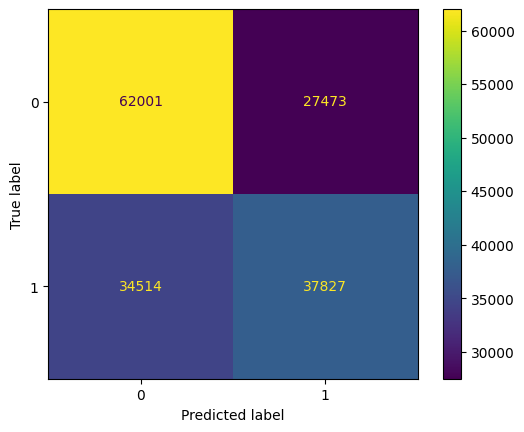

In [62]:
print("Accuracy: ", acc_kNN)
print("Precision: ", precision_kNN)
print("Recall: ", recall_kNN)
print("F1: ", f1_kNN)
print(grid_kNN.best_params_)
print(grid_kNN.best_estimator_)
print(classification_report(y_test, y_pred_kNN))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_kNN)

# Naïve Bayes

              precision    recall  f1-score   support

           0       0.59      0.76      0.67     89474
           1       0.55      0.36      0.43     72341

    accuracy                           0.58    161815
   macro avg       0.57      0.56      0.55    161815
weighted avg       0.57      0.58      0.56    161815



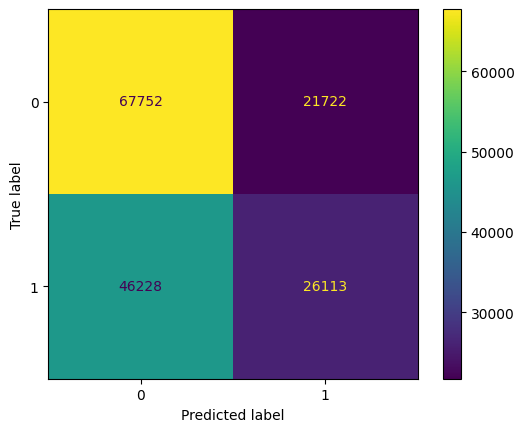

In [30]:
# Train Naïve Bayes model
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)
# Evaluate model
acc_gnb = round(accuracy_score(y_test, y_pred_gnb),4)
precision_gnb = round((precision_score(y_test, y_pred_gnb, average = 'macro')),4)
f1_gnb = round((f1_score(y_test, y_pred_gnb, average = 'macro')),4)
recall_gnb = round((recall_score(y_test, y_pred_gnb, average = 'macro')),4)
print(classification_report(y_test, y_pred_gnb))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_gnb)

Accuracy:  0.5801
Precision:  0.5702
Recall:  0.5591
F1:  0.5503
              precision    recall  f1-score   support

           0       0.59      0.76      0.67     89474
           1       0.55      0.36      0.43     72341

    accuracy                           0.58    161815
   macro avg       0.57      0.56      0.55    161815
weighted avg       0.57      0.58      0.56    161815



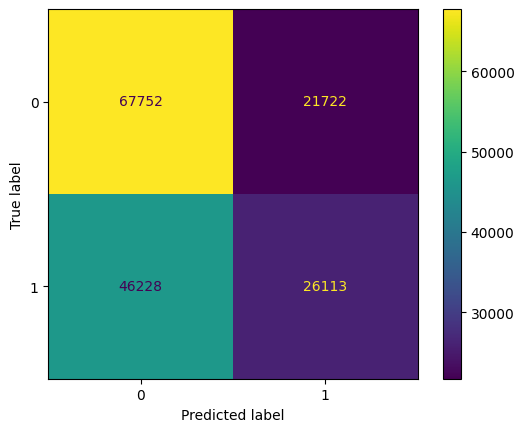

In [63]:
print("Accuracy: ", acc_gnb)
print("Precision: ", precision_gnb)
print("Recall: ", recall_gnb)
print("F1: ", f1_gnb)
print(classification_report(y_test, y_pred_gnb))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_gnb)

# RandomForest

              precision    recall  f1-score   support

           0       0.65      0.67      0.66     89474
           1       0.57      0.55      0.56     72341

    accuracy                           0.62    161815
   macro avg       0.61      0.61      0.61    161815
weighted avg       0.62      0.62      0.62    161815



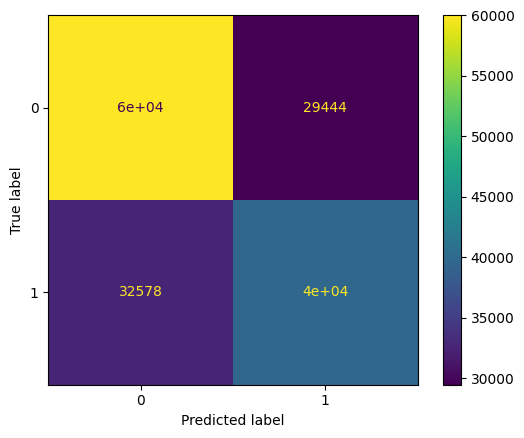

In [29]:
# Train RandomForest model
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)
# Evaluate model
acc_rfc = round(accuracy_score(y_test, y_pred_rfc),4)
precision_rfc = round((precision_score(y_test, y_pred_rfc, average = 'macro')),4)
f1_rfc = round((f1_score(y_test, y_pred_rfc, average = 'macro')),4)
recall_rfc = round((recall_score(y_test, y_pred_rfc, average = 'macro')),4)
print(classification_report(y_test, y_pred_rfc))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rfc)

Accuracy:  0.6167
Precision:  0.6114
Recall:  0.6103
F1:  0.6106
              precision    recall  f1-score   support

           0       0.65      0.67      0.66     89474
           1       0.57      0.55      0.56     72341

    accuracy                           0.62    161815
   macro avg       0.61      0.61      0.61    161815
weighted avg       0.62      0.62      0.62    161815



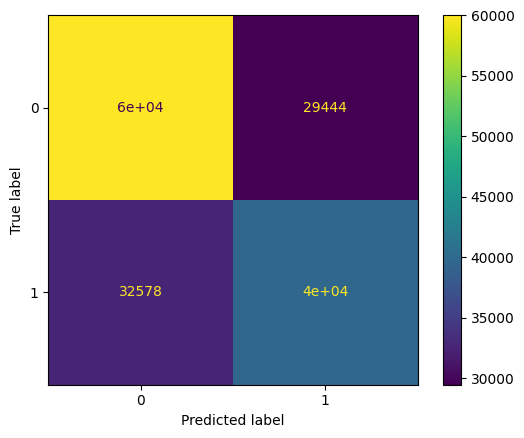

In [64]:
print("Accuracy: ", acc_rfc)
print("Precision: ", precision_rfc)
print("Recall: ", recall_rfc)
print("F1: ", f1_rfc)
print(classification_report(y_test, y_pred_rfc))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rfc)

# Decision Tree

              precision    recall  f1-score   support

           0       0.63      0.71      0.67     89474
           1       0.57      0.48      0.52     72341

    accuracy                           0.61    161815
   macro avg       0.60      0.59      0.59    161815
weighted avg       0.60      0.61      0.60    161815



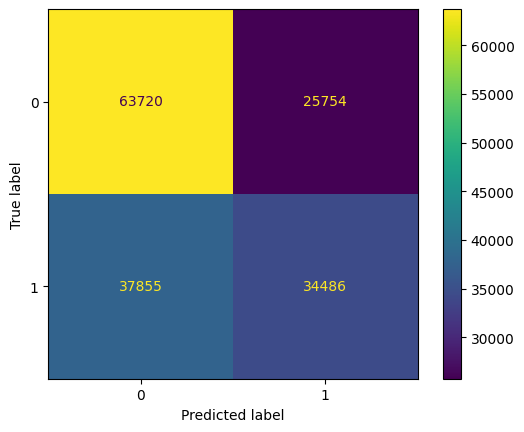

In [28]:
# Train Decision Tree model
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)
y_pred_dtc = dtc.predict(X_test)
# Evaluate model
acc_dtc = round(accuracy_score(y_test, y_pred_dtc),4)
precision_dtc = round((precision_score(y_test, y_pred_dtc, average = 'macro')),4)
f1_dtc = round((f1_score(y_test, y_pred_dtc, average = 'macro')),4)
recall_dtc = round((recall_score(y_test, y_pred_dtc, average = 'macro')),4)
print(classification_report(y_test, y_pred_dtc))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_dtc)

Accuracy:  0.6069
Precision:  0.5999
Recall:  0.5944
F1:  0.5936
              precision    recall  f1-score   support

           0       0.63      0.71      0.67     89474
           1       0.57      0.48      0.52     72341

    accuracy                           0.61    161815
   macro avg       0.60      0.59      0.59    161815
weighted avg       0.60      0.61      0.60    161815



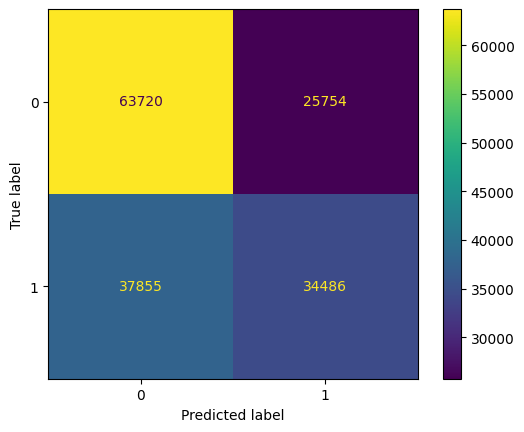

In [65]:
print("Accuracy: ", acc_dtc)
print("Precision: ", precision_dtc)
print("Recall: ", recall_dtc)
print("F1: ", f1_dtc)
print(classification_report(y_test, y_pred_dtc))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_dtc)

# Compare

In [35]:
t = PrettyTable(['','accuracy','precision','recall','f1'])
t.add_row(['Neural Network',acc_mlp,precision_mlp,recall_mlp,f1_mlp])
t.add_row(['SVM',acc_svm,precision_svm,recall_svm,f1_svm])
t.add_row(['kNN',acc_kNN,precision_kNN,recall_kNN,f1_kNN])
t.add_row(['Naïve Bayes',acc_gnb,precision_gnb,recall_gnb,f1_gnb])
t.add_row(['RandomForest',acc_rfc,precision_rfc,recall_rfc,f1_rfc])
t.add_row(['Decision Tree',acc_dtc,precision_dtc,recall_dtc,f1_dtc])
print(t)

+----------------+----------+-----------+--------+--------+
|                | accuracy | precision | recall |   f1   |
+----------------+----------+-----------+--------+--------+
| Neural Network |  0.6396  |   0.6412  | 0.6196 | 0.6146 |
|      SVM       |  0.6052  |   0.6013  | 0.5831 | 0.574  |
|      kNN       |  0.6169  |   0.6108  | 0.6079 | 0.6082 |
|  Naïve Bayes   |  0.5801  |   0.5702  | 0.5591 | 0.5503 |
|  RandomForest  |  0.6167  |   0.6114  | 0.6103 | 0.6106 |
| Decision Tree  |  0.6069  |   0.5999  | 0.5944 | 0.5936 |
+----------------+----------+-----------+--------+--------+


Accuracy

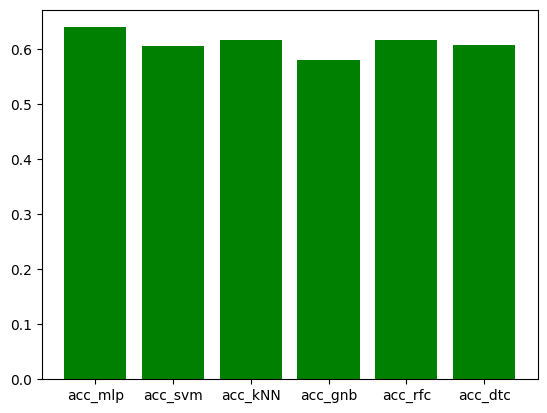

In [49]:
values_accuracy = [acc_mlp, acc_svm, acc_kNN, acc_gnb, acc_rfc, acc_dtc]
names = ["acc_mlp", "acc_svm", "acc_kNN", "acc_gnb", "acc_rfc", "acc_dtc"]

plt.bar(names, values_accuracy, color='green', width = 0.8)
plt.show()

Precision

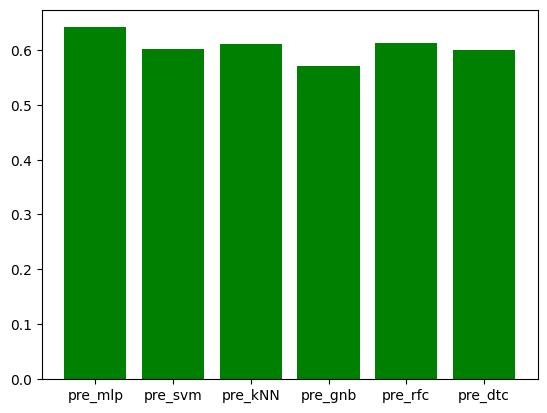

In [54]:
value_precision = [precision_mlp, precision_svm, precision_kNN, precision_gnb, precision_rfc, precision_dtc]
names = ["pre_mlp", "pre_svm", "pre_kNN", "pre_gnb", "pre_rfc", "pre_dtc"]
plt.bar(names, value_precision, color='green', width = 0.8)
plt.show()

Recall

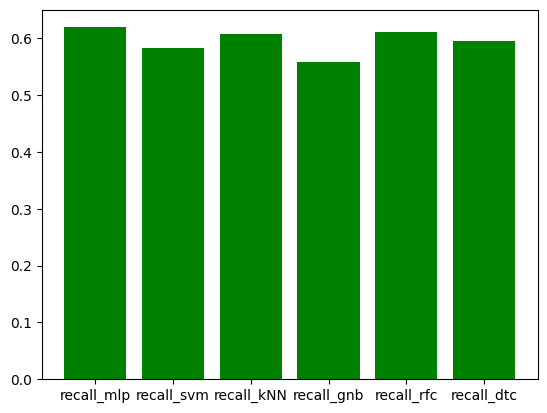

In [52]:
value_recall = [recall_mlp, recall_svm, recall_kNN, recall_gnb, recall_rfc, recall_dtc]
names = ["recall_mlp", "recall_svm", "recall_kNN", "recall_gnb", "recall_rfc", "recall_dtc"]

plt.bar(names, value_recall, color='green')
plt.show()

F1

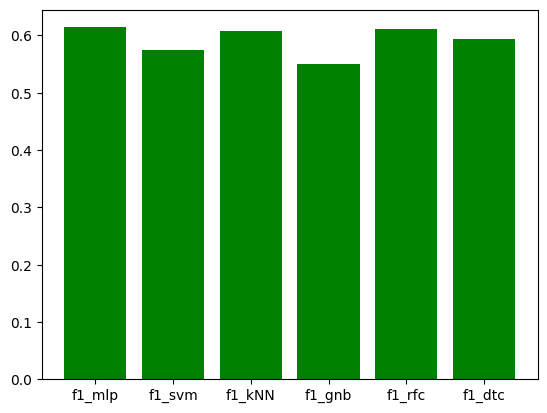

In [53]:
value_f1 = [f1_mlp, f1_svm, f1_kNN, f1_gnb, f1_rfc, f1_dtc]
names = ["f1_mlp", "f1_svm", "f1_kNN", "f1_gnb", "f1_rfc", "f1_dtc"]

plt.bar(names, value_f1, color='green')
plt.show()